In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from os import listdir
import cv2

#create a function to rename files and pass if file is already renamed and save to a different directory
def rename_files(directory, category):
    for i, filename in enumerate(os.listdir(directory)):
        try:
            os.rename(directory + "/" + filename, directory + "/" + category + "." + str(i) + ".jpg")
        except:
            continue
    print(f"done renaming {category} files")

rename_files("./data/bicycles", "bicycles")
rename_files("./data/cars", "cars")
rename_files("./data/deer", "deer")
rename_files("./data/mountains", "mountains")
#convert images to RGB and resize to 180x180
def convert_images(directory):
    num_skipped = 0
    for root, dirs, files in os.walk(directory):
      path = root.split(os.sep)

      for file in files:
        _, extension = os.path.splitext(file)

        if extension == ".jpg":
          filepath = root + "/" + file

          try:
            fobj = open(filepath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
          finally:
            fobj.close()

          if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(filepath)
    print(f"Deleted {num_skipped} images")
convert_images("./data/")


#additional troubleshooting to find the invalid files

# if an error "Corrupt JPEG data: xxx extraneous bytes before marker 0xd9" occurs, some files are corrupted and need to be removed
# use this code to search for the corrupted files and then rmemove them manually
#check if the image is valid
def is_valid (directory):
  num_invalid = 0
  for filename in listdir(directory):
      print(directory+"/" +filename)
      try:
          img = cv2.imread(directory +"/"+ filename)
      except:
        continue
      if img is None:
              print("invalid file")
              #remove invalid file
              os.remove(directory+"/" + filename)
              print(filename + " removed")
              num_invalid += 1
  print("number of invalid files: " + str(num_invalid))

is_valid("./data2/bicycles")
is_valid("./data2/cars")
is_valid("./data2/deer")
is_valid("./data2/mountains")

print("done")
#remove invalid files from the directory manually




2023-02-15 09:09:00.133922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


FileNotFoundError: [Errno 2] No such file or directory: './data/bicycles'

In [2]:
import cv2
from matplotlib import pyplot as plt
import os
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

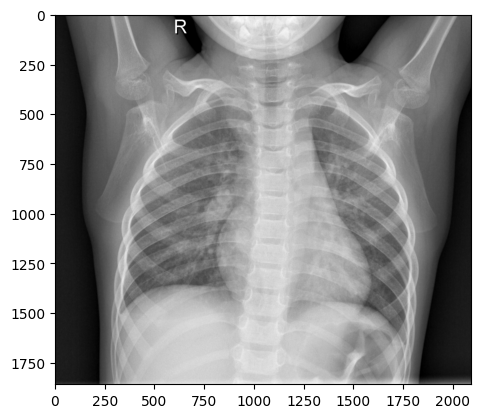

In [11]:
original = cv2.imread("./chest_xray/train/NORMAL/IM-0115-0001.jpeg", cv2.IMREAD_COLOR)

rgb_img = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

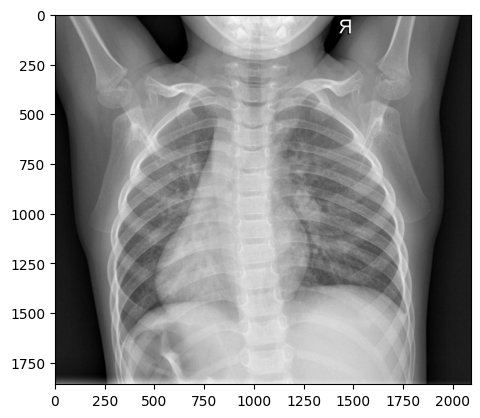

In [12]:
flipped_img = cv2.flip(rgb_img, 1)
plt.imshow(flipped_img)

In [36]:
num_skipped = 0
for root, dirs, files in os.walk("./chest_xray"):
  path = root.split(os.sep)

  for file in files:
    _, extension = os.path.splitext(file)

    if extension == ".jpg":
      filepath = root + "/" + file

      try:
        fobj = open(filepath, "rb")
        is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
      finally:
        fobj.close()

      if not is_jfif:
        num_skipped += 1
        # Delete corrupted image
        os.remove(filepath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [37]:
# Change this to match your data
images_path = "./chest_xray/train"
training_dataset = keras.preprocessing.image_dataset_from_directory(
  images_path,
  labels='inferred',
  label_mode='categorical',
  color_mode="rgb",
  batch_size=32,
  image_size=(150, 150),
  seed=1
)
images_path = "./chest_xray/test"
test_dataset = keras.preprocessing.image_dataset_from_directory(
  images_path,
  labels='inferred',
  label_mode='categorical',
  color_mode="rgb",
  batch_size=32,
  image_size=(150, 150),
  seed=1
)
images_path = "./chest_xray/val"
validation_dataset = keras.preprocessing.image_dataset_from_directory(
  images_path,
  labels='inferred',
  label_mode='categorical',
  color_mode="rgb",
  batch_size=32,
  image_size=(150, 150),
  seed=1
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [38]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(150, 150, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.experimental.preprocessing.Rescaling(1./255),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2,activation='softmax')
])

In [39]:
model.compile(
        optimizer='rmsprop',
        loss="categorical_crossentropy",
        metrics=['accuracy']
    )

In [40]:
history = model.fit(training_dataset,validation_data=validation_dataset,epochs=16)

Epoch 1/16
163/163 [==============================] - 83s 472ms/step - loss: 0.6606 - accuracy: 0.7517 - val_loss: 0.7777 - val_accuracy: 0.5625
Epoch 2/16
163/163 [==============================] - 84s 511ms/step - loss: 0.3558 - accuracy: 0.8530 - val_loss: 0.7652 - val_accuracy: 0.5625
Epoch 3/16
163/163 [==============================] - 85s 518ms/step - loss: 0.2927 - accuracy: 0.8842 - val_loss: 0.6155 - val_accuracy: 0.6875
Epoch 4/16
163/163 [==============================] - 87s 527ms/step - loss: 0.2609 - accuracy: 0.8993 - val_loss: 0.5684 - val_accuracy: 0.6875
Epoch 5/16
163/163 [==============================] - 93s 565ms/step - loss: 0.2453 - accuracy: 0.9084 - val_loss: 0.6086 - val_accuracy: 0.6875
Epoch 6/16
163/163 [==============================] - 88s 536ms/step - loss: 0.2128 - accuracy: 0.9174 - val_loss: 0.4864 - val_accuracy: 0.7500
Epoch 7/16
163/163 [==============================] - 84s 512ms/step - loss: 0.2067 - accuracy: 0.9212 - val_loss: 0.5471 - val_ac

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 150, 150, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                  

In [42]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

20/20 [==============================] - 4s 157ms/step - loss: 0.5866 - accuracy: 0.8526
Test loss: 0.587
Test accuracy: 0.853


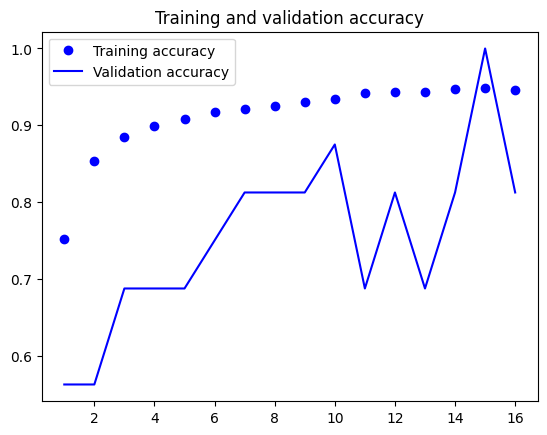

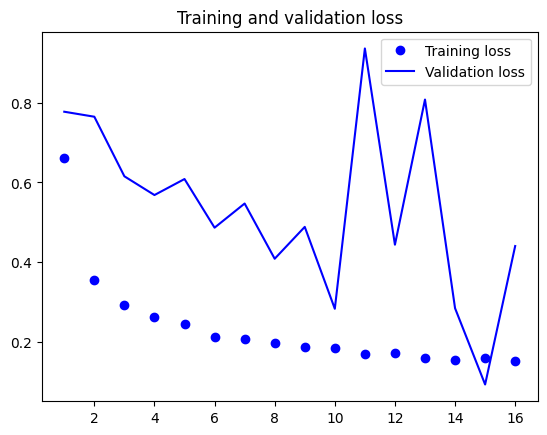

In [43]:
#import matplotlib to plot the training and validation accuracy and loss
import matplotlib.pyplot as plt
#stating the variables for the training and validation accuracy and loss plots
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, 17 )

#plot the training and validation accuracy and loss
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

#show the plots
plt.show()

In [80]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
# Load the model
# ui for loading image
image_path="chest_xray/test/PNEUMONIA/person11_virus_38.jpeg"
#image_path = input("Enter the path to the image: ")
# Load the image
img =image.load_img(image_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

1/1 [==============================] - 0s 36ms/step
[[0.00191636 0.9980837 ]]


In [64]:
label = "bicycles" if idx == 0 else "cars" if idx == 1 else "deer" if idx == 2 else "mountains"
print(label)


bicycles


In [73]:
from glob import glob
class_names = glob("*") # Reads all the folders in which images are present
class_names = sorted(class_names) # Sorting them
name_id_map = dict(zip(class_names, range(len(class_names))))

In [74]:
print(name_id_map)

{'LungCancer.jpeg': 0, 'README.txt': 1, 'Untitled.ipynb': 2, 'accuracy.png': 3, 'cancer.jpeg': 4, 'checking.py': 5, 'chest_xray': 6, 'classify.py': 7, 'healthy.jpeg': 8, 'healthy2.jpeg': 9, 'loadImage.py': 10, 'loss.png': 11, 'preprocessing.py': 12, 'training.py': 13}
